# Rough working code to push the Project


In [1]:
#importing the relevant modules

#pandas
import pandas as pd

# matlab
import matplotlib.pyplot as plt

# to ensure all data visualizations appear on the same notebook and also stored here.
%matplotlib inline 

#seaborn
import seaborn as sns

#sqlite3
import sqlite3

#csv
import csv

#regex
import re

#defining a function for loading all columns from a table for Exploritory Data Analysis.

def load_SQL(column,table):
    
    data =pd.read_sql(f'''
                        SELECT {column}
                        FROM {table}
                        ''',conn)
    return data

In [2]:
budget_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz',compression='infer')

#.head() allows us to preview the first five rows.
budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


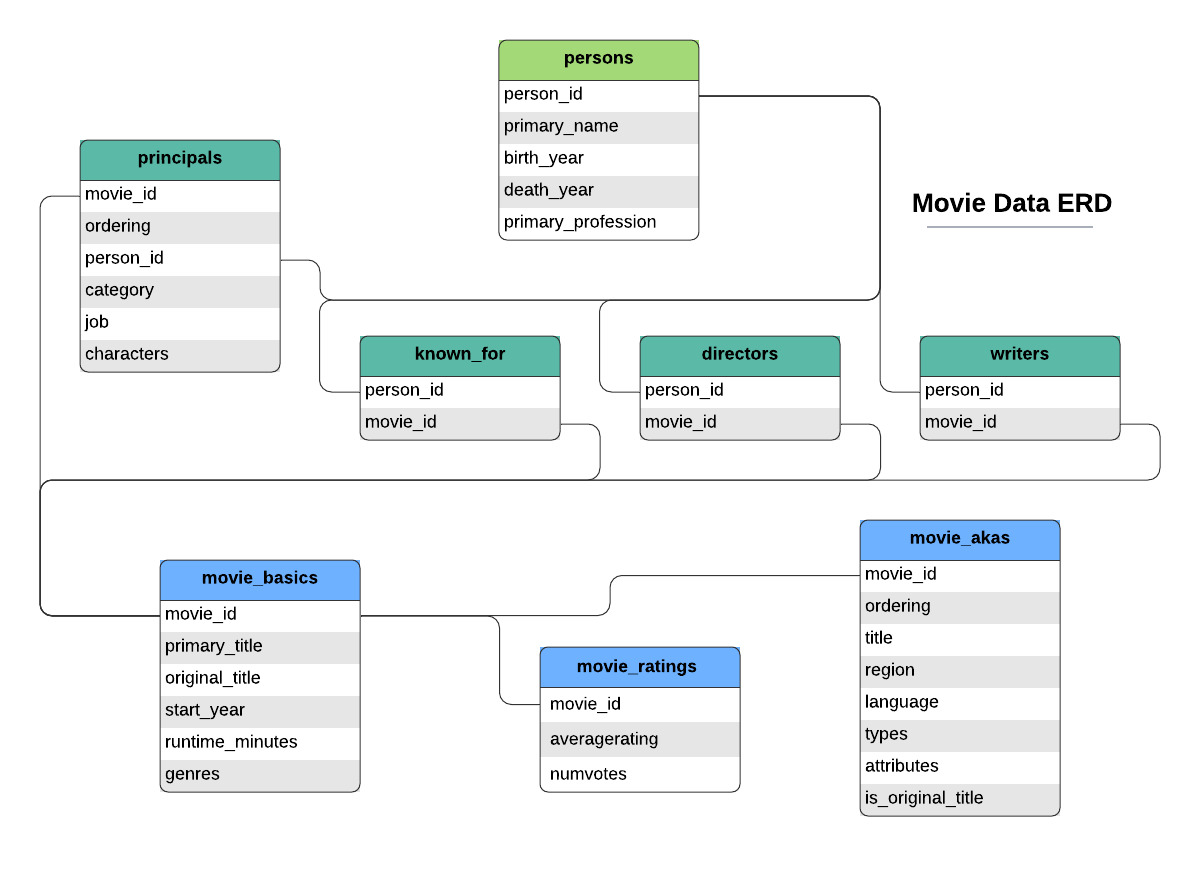

In [3]:
# Genre ids meaning for tmdb.movies
tmdb_df = pd.read_csv('zippedData/tmdb.movies.csv.gz', encoding = 'latin-1', compression='infer',index_col= 0)

tmdb_df.head(50)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229
6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340
8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057
9,"[16, 28, 35, 10751, 878]",38055,en,Megamind,22.855,2010-11-04,Megamind,6.8,3635


In [4]:
# function for removing white space from column names
def Strip_whitespace(data):
    data = data.columns.str.replace(' ', '')
    return data

In [5]:
Strip_whitespace(tmdb_df)

Index(['genre_ids', 'id', 'original_language', 'original_title', 'popularity',
       'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [6]:
tmdb_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [7]:
budget_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz',compression='infer')

#.head() allows us to preview the first five rows.
budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [8]:
conn = sqlite3.connect('zippedData/im.db')

In [9]:
#fetching all the names of the tables found in the database.
cursor_ = conn.cursor()

cursor_.execute("""
SELECT name
FROM sqlite_master
WHERE type ='table';
""")

table_names = cursor_.fetchall()
table_names

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

In [10]:
# taking a look at the movie_basics table from the sql.
movie_basics_df = load_SQL('*','movie_basics')


movie_basics_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [11]:
J = """
SELECT *
FROM movie_basics
WHERE movie_id = 'tt8273150'
"""
jj = pd.read_sql(J,conn)
jj

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt8273150,Logistics,Logistics,2012,51420.0,Documentary


<AxesSubplot:>

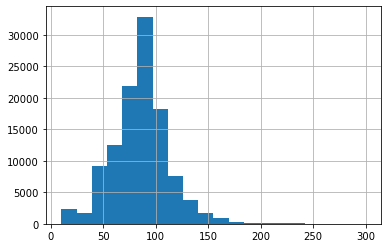

In [12]:
movie_basics_df['runtime_minutes'].hist(range=[10,300],bins = 20)

In [13]:
w = """
SELECT movie_id,genres,averagerating,numvotes,AVG(averagerating) AS avg_rates,SUM(numvotes) AS TTL_votes
FROM movie_basics
JOIN movie_ratings
USING(movie_id)
WHERE runtime_minutes IS NOT NULL and genres IS NOT NULL
GROUP BY genres
ORDER BY avg_rates
"""
joined_movie = pd.read_sql(w,conn)
joined_movie = joined_movie.set_index('genres')

In [14]:
w = """
SELECT runtime_minutes,movie_id

FROM movie_basics

WHERE runtime_minutes IS NOT NULL and genres IS NOT NULL and original_title IS NOT NULL and runtime_minutes < 400



"""
runtime_movies = pd.read_sql(w,conn)
runtime_movies.value_counts()

runtime_minutes  movie_id  
1.0              tt10265824    1
94.0             tt3665760     1
                 tt3700566     1
                 tt3698258     1
                 tt3696358     1
                              ..
77.0             tt2308659     1
                 tt2306767     1
                 tt2304901     1
                 tt2294923     1
396.0            tt7646296     1
Length: 112163, dtype: int64

In [15]:
x = runtime_movies.set_index(['runtime_minutes'])


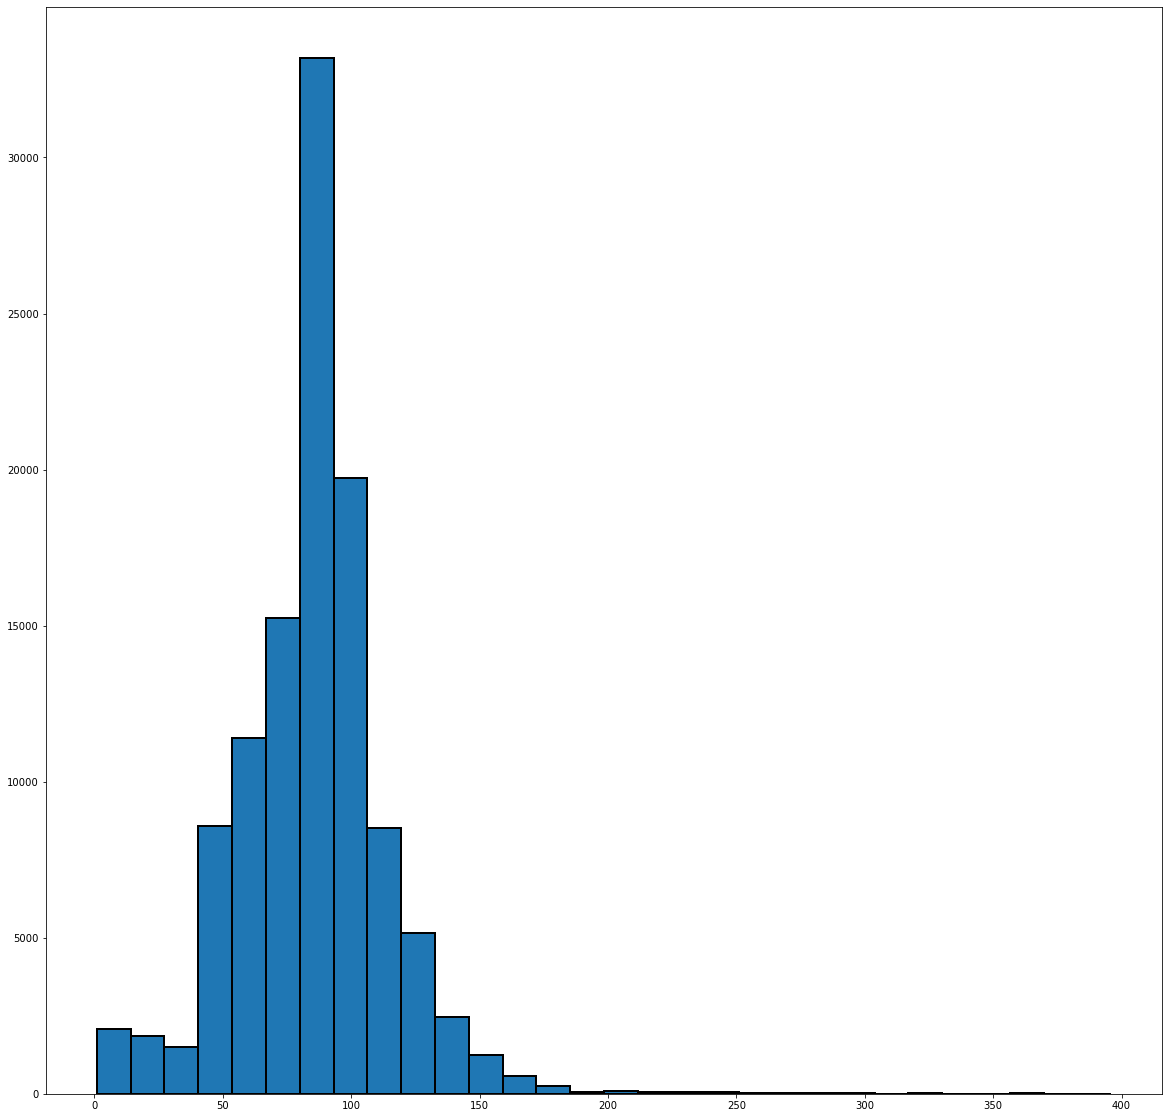

In [16]:
runtime_movies["runtime_minutes"].hist(bins =30, figsize=(20,20),grid = False,linewidth = 2,edgecolor = 'k');
# fig,ax=plt.subplots(figsize=(15,15))
# ax.hist(runtime_movies)


# ax.set_xlabel('Genres', fontsize = 20)
# ax.get_yaxis().get_major_formatter().set_scientific(False)
# ax.set_ylabel('Avg rating', fontsize = 20)
# plt.xticks(fontsize = 12, rotation = 75, )
# plt.yticks(fontsize = 20)
# ax.set_title('Genre Ratings from IMDB ', fontsize = 20)

# ax.figure.savefig('Genre Ratings from IMDB.png')
plt.show()

In [17]:
w = """
SELECT movie_id,genres,averagerating,numvotes,AVG(averagerating) AS avg_rates,SUM(numvotes) AS TTL_votes
FROM movie_basics
JOIN movie_ratings
USING(movie_id)
WHERE runtime_minutes IS NOT NULL and genres IS NOT NULL
GROUP BY genres
ORDER BY avg_rates
"""
joined_movie = pd.read_sql(w,conn)

#to ensure genres is the index.
joined_movie 

,movie_id,genres,averagerating,numvotes,avg_rates,TTL_votes
0,tt5161302,"Comedy,Musical,Sport",1.4,28,1.4,28
1,tt3718824,"Adult,Horror",2.0,128,2.0,128
2,tt3140634,"Adventure,Crime,Romance",2.3,9,2.3,9
3,tt4656810,"History,Sci-Fi,Thriller",2.3,227,2.3,227
4,tt8463476,"Crime,Music",2.4,88,2.4,88
...,...,...,...,...,...,...
901,tt4477888,"Documentary,News,Sport",8.8,25,8.8,25
902,tt9060598,"Drama,Short",8.8,8,8.8,8
903,tt2896176,Game-Show,9.0,7,9.0,7
904,tt3856476,"Documentary,Family,Musical",9.3,19,9.3,19


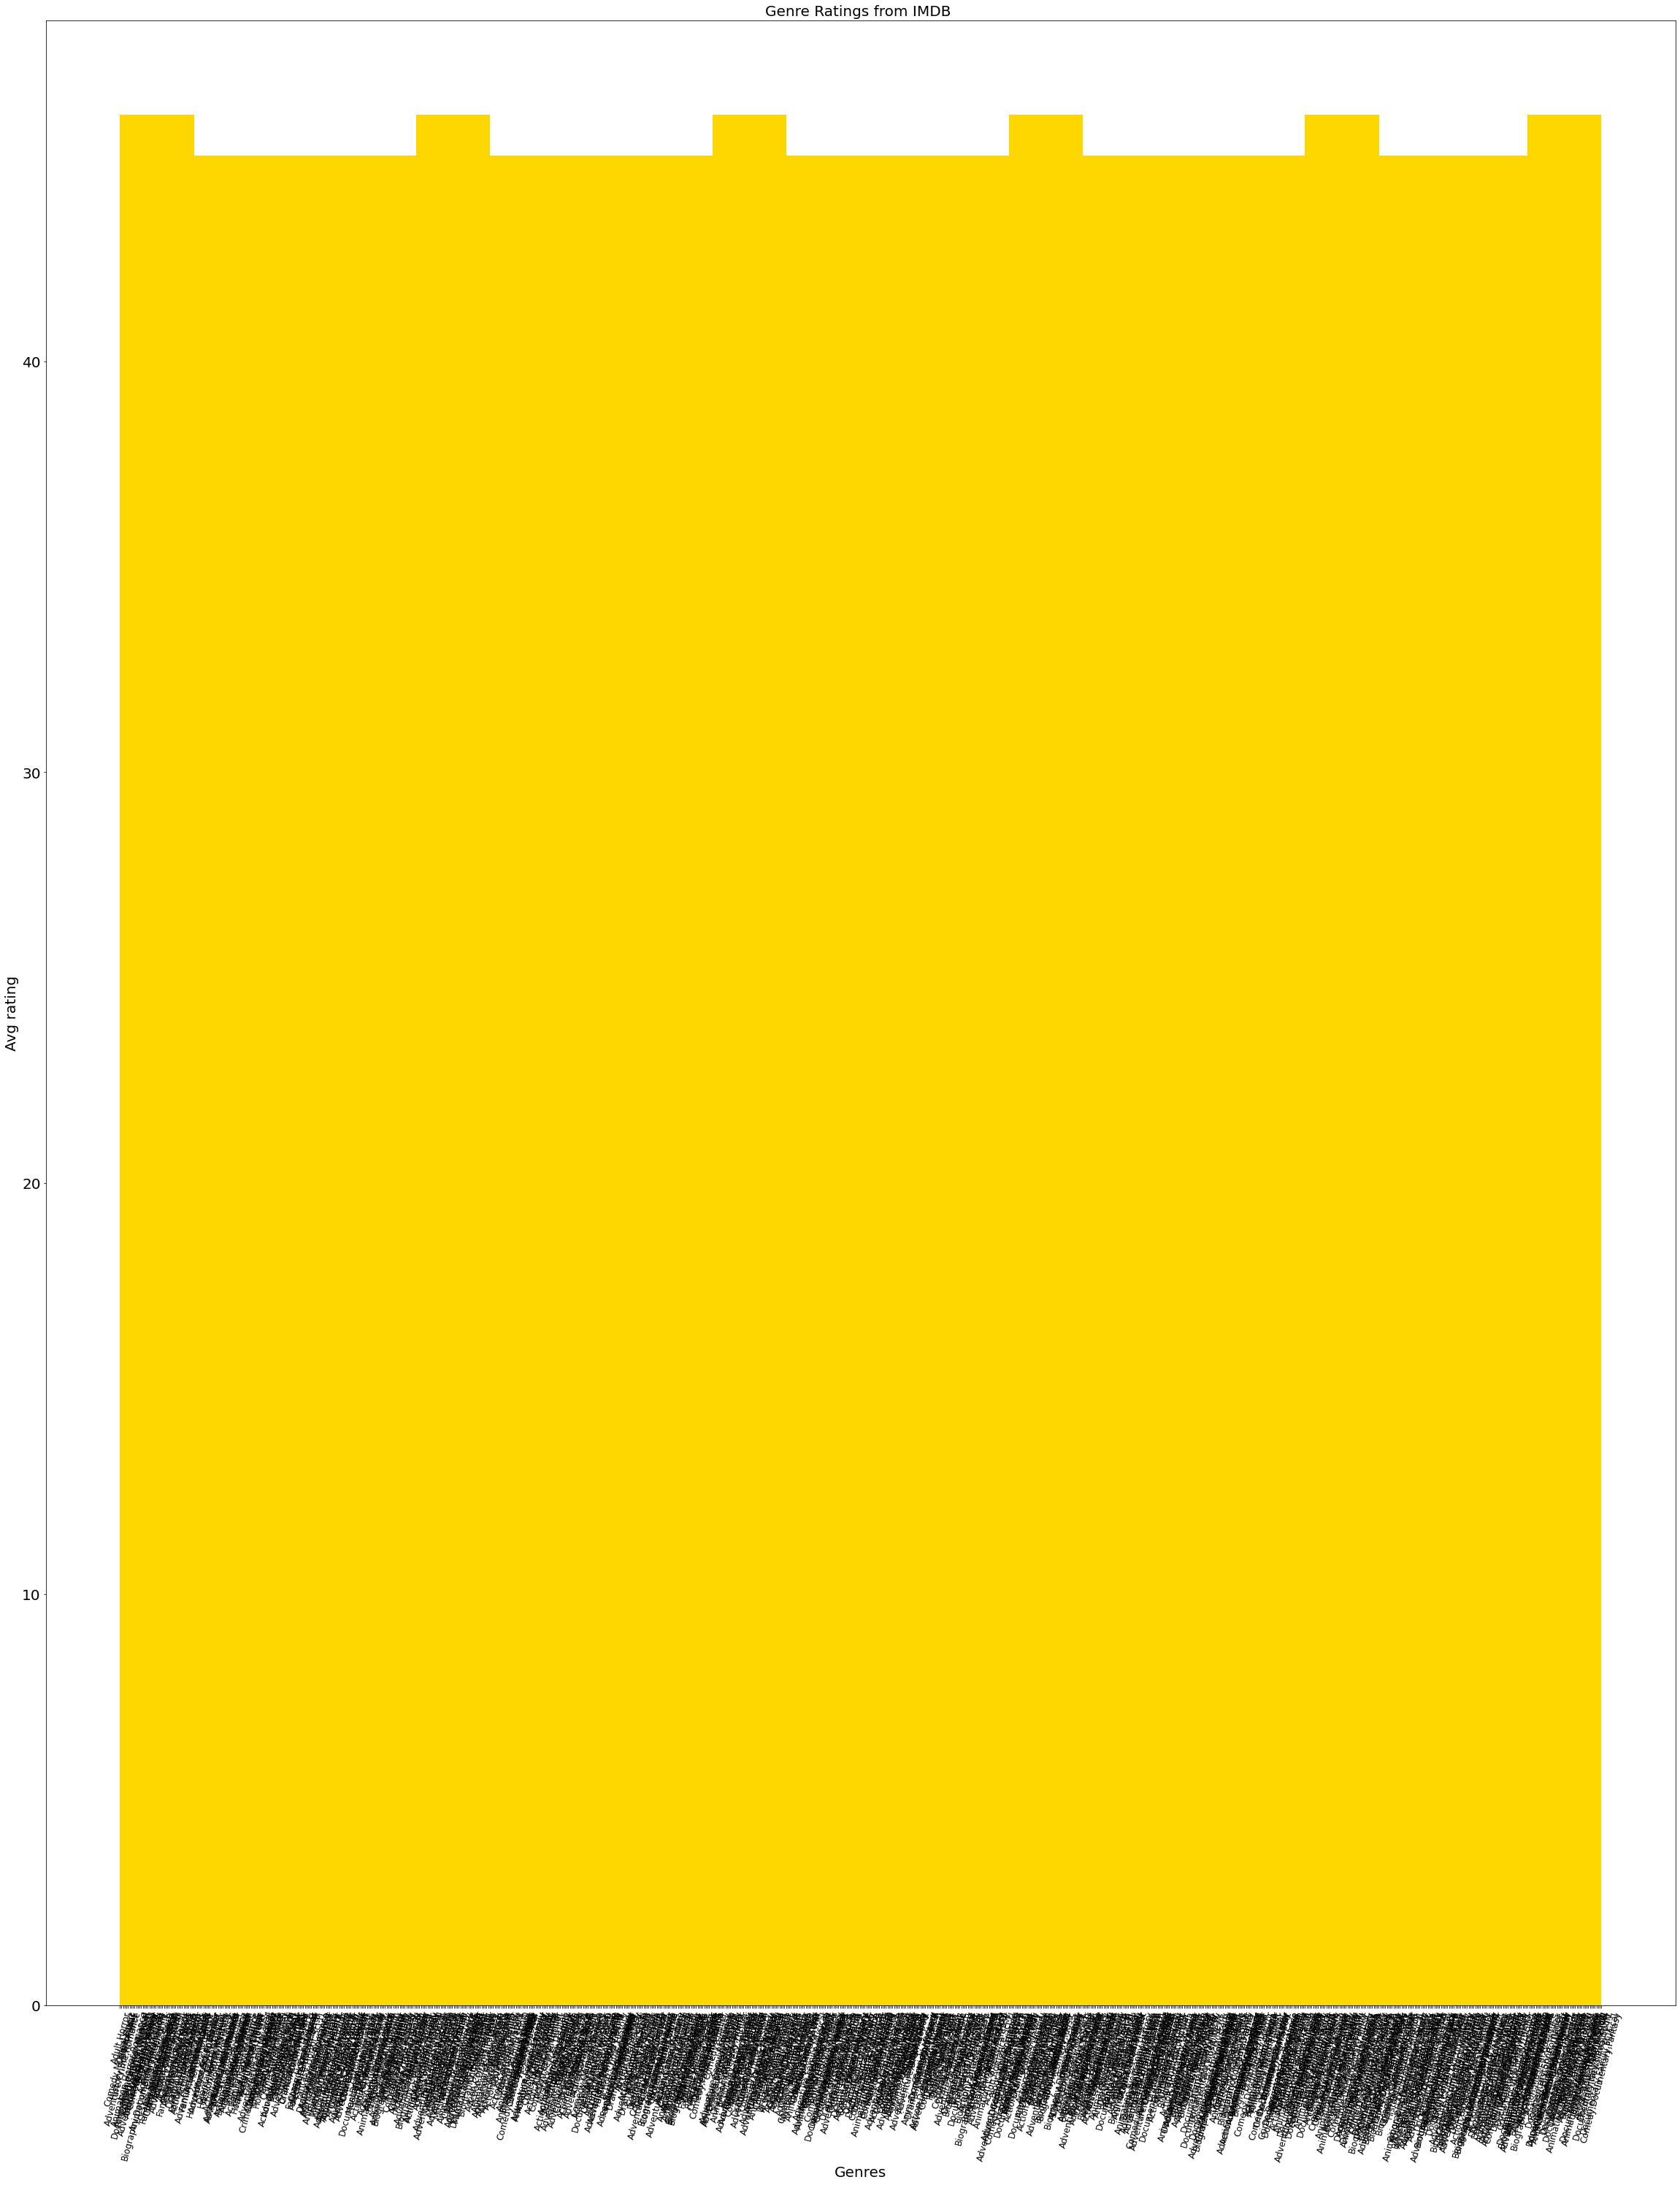

In [20]:
fig,ax = plt.subplots(figsize=(40,50))
ax.hist(joined_movie['genres'], color = 'gold',bins = 20)

ax.set_xlabel('Genres', fontsize = 20)
ax.set_ylabel('Avg rating', fontsize = 20)
plt.xticks(fontsize = 12, rotation = 75, )
plt.yticks(fontsize = 20)
ax.set_title('Genre Ratings from IMDB ', fontsize = 20)

ax.figure.savefig('Genre Ratings from IMDB.png')

In [19]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']